# Original Urnings with different urn sizes

In [42]:
import numpy as np 
from Agents import Player
from Game_Type import Game_Type
from Urnings import Urnings
import matplotlib.pyplot as plt
import utilities as util

# Parameters

In [43]:
#Seed
np.random.seed(13181913)
n_game = 300
n_player = 1500
n_items = 300

item_urn_size = 64
item_true_values = []
item_starting_values = []

for i in range(n_items):
    curr_true_val = np.random.uniform()
    item_true_values.append(curr_true_val)
    item_starting_values.append(np.random.binomial(item_urn_size, curr_true_val))

player_urn_size = 64
min_urn = 8
max_urn = 64
player_true_values = []
player_starting_values = int(0.5 * player_urn_size)
player_starting_values_perm = int(0.5 * min_urn)
#player_starting_values = []
#player_starting_values_perm = []

for p in range(n_player):
    player_true_values.append(np.random.uniform())
    curr_starting_value = np.random.randint(0, min_urn)
    #player_starting_values_perm.append(curr_starting_value)
    #player_starting_values.append(curr_starting_value * (player_urn_size/min_urn))


# Max fixed  urn size 

In [44]:
players = []
items = []

for p in range(n_player):
    pname = "Player" + str(p)
    players.append(Player(pname, player_starting_values, player_urn_size, player_true_values[p]))

for i in range(n_items):
    iname = "Item" + str(i)
    items.append(Player(iname, item_starting_values[i], item_urn_size, item_true_values[i]))

game_type = Game_Type("adaptive", "Urnings1", paired_update=False)
game = Urnings(players, items, game_type)
game.play(n_games=n_game, test=True)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


0.1294227176699359 0.044673286797356264 0.06531647678929896 0.007192759315820525
0.09726310845739046 0.04525352118183123
98


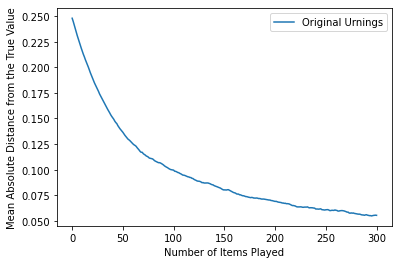

In [45]:
import matplotlib.pyplot as plt
urnings_container = np.zeros((n_player,n_game+1))
for i in range(n_player):
    player_MAD = np.abs(players[i].estimate_container - players[i].true_value)
    urnings_container[i,:] = player_MAD

plt.plot(np.mean(urnings_container, axis=0), label = "Original Urnings")
plt.xlabel("Number of Items Played")
plt.ylabel("Mean Absolute Distance from the True Value")
plt.legend()

print(np.mean(np.mean(urnings_container, axis=0)[:150]), np.std(np.mean(urnings_container, axis=0)[:150]), np.mean(np.mean(urnings_container, axis=0)[150:]), np.std(np.mean(urnings_container, axis=0)[150:]))
print(np.mean(np.mean(urnings_container, axis=0)), np.std(np.mean(urnings_container, axis=0)))
print(util.hitting_below(np.mean(urnings_container, axis=0), 0.1))

# Min fixed urn size

In [46]:
players8 = []
items8 = []

for p in range(n_player):
    pname = "Player" + str(p) 
    players8.append(Player(pname, player_starting_values_perm, min_urn, player_true_values[p]))
for i in range(n_items):
    iname = "Item" + str(i)
    items8.append(Player(iname, item_starting_values[i], item_urn_size, item_true_values[i]))

game_type = Game_Type("adaptive", "Urnings1", paired_update=False)
game = Urnings(players8, items8, game_type)
game.play(n_games=n_game, test=True)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


0.11870282570791213 0.022883688123261296 0.1108187852821043 0.0020722839904324542
0.11474770908234076 0.016692974104908345
50


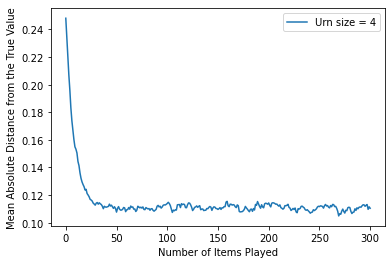

In [47]:
import matplotlib.pyplot as plt
urnings_container8 = np.zeros((n_player,n_game+1))
for i in range(n_player):
    player_MAD = np.abs(players8[i].estimate_container - players8[i].true_value)
    urnings_container8[i,:] = player_MAD

plt.plot(np.mean(urnings_container8, axis=0), label = "Urn size = 4")
plt.xlabel("Number of Items Played")
plt.ylabel("Mean Absolute Distance from the True Value")
plt.legend()

print(np.mean(np.mean(urnings_container8, axis=0)[:150]), np.std(np.mean(urnings_container8, axis=0)[:150]), np.mean(np.mean(urnings_container8, axis=0)[150:]), np.std(np.mean(urnings_container8, axis=0)[150:]))
print(np.mean(np.mean(urnings_container8, axis=0)), np.std(np.mean(urnings_container8, axis=0)))
print(util.hitting_time(np.mean(urnings_container8, axis=0), 0.1))

# Adaptive Step Size

In [48]:
players_perm = []
items_perm = []

for p in range(n_player):
    pname = "Player" + str(p)
    players_perm.append(Player(pname, player_starting_values_perm, min_urn, player_true_values[p]))
for i in range(n_items):
    iname = "Item" + str(i)
    items_perm.append(Player(iname, item_starting_values[i], item_urn_size, item_true_values[i]))

game_type_perm = Game_Type("adaptive", 
                          "Urnings1", 
                          paired_update=True, 
                          adaptive_urn=True, 
                          adaptive_urn_type="permutation", 
                          window=10, 
                          min_urn=min_urn, 
                          max_urn=max_urn,
                          permutation_test=True, 
                          perm_p_val=0.1)
game_perm = Urnings(players_perm, items_perm, game_type_perm)
game_perm.play(n_games=n_game, test=True)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


0.08504546909662287 0.03592080225187116 0.055154642302330414 0.002460383709344291
0.0700504031632735 0.029485731649212126
27


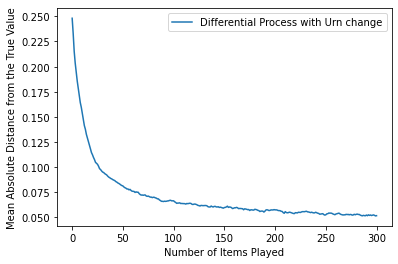

In [49]:
import matplotlib.pyplot as plt
urnings_container_perm = np.zeros((n_player,n_game+1))
for i in range(n_player):
    player_MAD = np.abs(players_perm[i].estimate_container - players_perm[i].true_value)
    urnings_container_perm[i,:] = player_MAD


plt.plot(np.mean(urnings_container_perm, axis=0), label = "Differential Process with Urn change")
plt.xlabel("Number of Items Played")
plt.ylabel("Mean Absolute Distance from the True Value")
plt.legend()

print(np.mean(np.mean(urnings_container_perm, axis=0)[:150]), np.std(np.mean(urnings_container_perm, axis=0)[:150]), np.mean(np.mean(urnings_container_perm, axis=0)[150:]), np.std(np.mean(urnings_container_perm, axis=0)[150:]))
print(np.mean(np.mean(urnings_container_perm, axis=0)), np.std(np.mean(urnings_container_perm, axis=0)))
print(util.hitting_below(np.mean(urnings_container_perm, axis=0), 0.1))

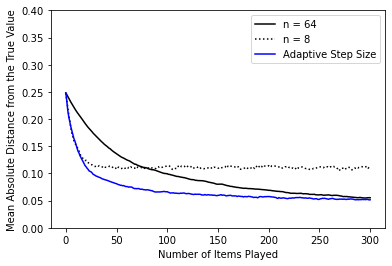

In [52]:
plt.plot(np.mean(urnings_container, axis=0), label = "n = " + str(player_urn_size) , color = "k")
#plt.plot(np.mean(urnings_container32, axis=0), label = "Urn size = 32", color = "k",  linestyle = "--")
plt.plot(np.mean(urnings_container8, axis=0), label = "n = " + str(min_urn), color = "k", linestyle = ":")
plt.plot(np.mean(urnings_container_perm, axis=0), label = "Adaptive Step Size", color = "b")
#plt.plot(np.mean(urnings_container_perm_stakes, axis=0), label = "Adaptive Stakes", color = "g")
plt.xlabel("Number of Items Played")
plt.ylabel("Mean Absolute Distance from the True Value")
plt.ylim(0, 0.4)
plt.legend()
plt.savefig("plot1_modifiedB")